In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [2]:
β_0 =1
p=1/500
N = 20000
T = 500
γ = 0.5
def dxdt(X, t, sign):
    inf = X*(β_0*(1+sign*p*t)*(N-X)/N-γ)
    return inf
# sign
def dvardt(X, tt , sign):
#     print(1-p*tt)
    return [X[0]*(β_0*(1+sign*p*tt)*(1-X[0])-γ),
            2*(β_0*(1+sign*p*tt) - γ -2*β_0*(1+sign*p*tt)*X[0])*X[1]+ β_0*(1+sign*p*tt)*(1-X[0])*X[0]+γ*X[0]]

ts = np.arange(0, T, 0.1)
P = odeint(dvardt, [0.5,0.5], ts, args=(-1,))

In [3]:
tstar = T*(1-γ/β_0)

(0, 500)

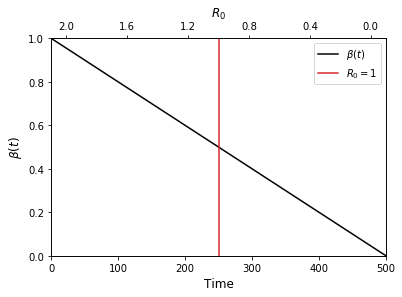

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(ts, [β_0*(1-p*tt) for tt in ts], c='k', label =r'$β(t)$')
ax2.plot([β_0*(1-p*tt)/γ for tt in ts], np.ones(len(ts))) # Create a dummy plot
ax2.cla()
ax2.set_xlabel(r'$R_0$', fontsize =12)
ax1.set_xlabel(r'Time', fontsize =12)
ax1.set_ylabel(r'$β(t)$', fontsize =12)
ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(β_0*(1-p*tt)/γ,2) for tt in ax1.get_xticks()])
ax1.plot([tstar,tstar],[0,1], c='tab:red', label = r'$R_0 = 1$')
ax1.legend()
ax1.set_ylim([0, 1])
ax1.set_xlim([0,T])

In [4]:
def dxdt(X, t, sign):
    inf = X*(β_0*(1+sign*p*t)*(N-X)/N-γ)
    return inf
def dxsteadydt(X, t, gamma):
    inf = X*(β_0*(N-X)/N-gamma)
    return inf

ts = np.arange(0, T, 0.1)
infection = odeint(dxdt, 0.5*N, ts, args=(-1,))
infection_steady = odeint(dxsteadydt, abs(1-γ)*N, ts, args=(γ,))

In [6]:
new_cases = [(β_0*(1-p*ts[t])*infection[t]/N*(1-infection[t]/N)) for t in np.arange(0,5000,10)]

In [8]:
new_cases_N = [(β_0*(1-p*ts[t])*infection[t]*(N-infection[t])/N) for t in np.arange(0,T*10,10)]
new_cases_N = np.ravel(new_cases_N)
infection_daily = ((np.ravel(infection))[np.arange(0, T*10, 10)])
sigma_y_x_2 = (N**2 +
               β_0*(1-p*np.arange(0,T,1))*N*(N-1-2*infection_daily) -
               5*β_0*(1-p*np.arange(0,T,1))*new_cases_N*N+
               (β_0*(1-p*np.arange(0,T,1))**2)*(4*infection_daily + (N-1)**2) +
               2*new_cases_N*(β_0*(1-p*np.arange(0,T,1))**2)*(3+4*infection_daily-2*N)+
               4*(new_cases_N**2)*(β_0*(1-p*np.arange(0,T,1))**2))
corr =  β_0*(1-p*np.arange(0,T,1))*(-1 -2*infection_daily + N - 2*new_cases_N)/np.sqrt(sigma_y_x_2)


/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


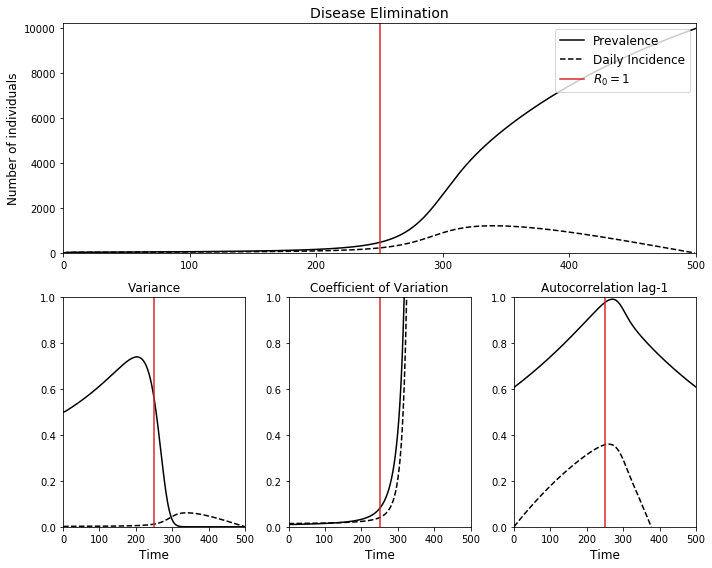

In [21]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(gs[0, :]) # row 0, col 0

plt.plot(ts,infection, c='k', label ='Prevalence')
plt.plot(range(500),[β_0*(1-p*ts[t])*infection[t]*(N-infection[t])/N for t in np.arange(0,5000,10)], 
         '--',c='k',label ='Daily Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')
plt.ylim([-1, 0.51*N])
plt.xlim([0, 500])
plt.legend(loc='upper right', fontsize = 12)
# plt.xlabel('Time', fontsize = 12)
plt.ylabel('Number of individuals', fontsize =12)
plt.title('Disease Elimination', fontsize = 14)
ax = plt.subplot(gs[1, 0]) # row 0, col 1

plt.plot(ts,P[:,1], c='k', label ='Prevalence')
plt.plot(range(500),[(β_0*(1-p*ts[t])*infection[t]*(N-infection[t])/N)/N for t in np.arange(0,5000,10)], 
         '--',c='k',label ='Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')
plt.ylim([0, 1])
plt.xlim([0, 500])
# plt.le/gend(loc='upper right', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Variance', fontsize =12)


ax = plt.subplot(gs[1, 1]) # row 1, span all columns
plt.plot(ts[:4000],(np.sqrt(P[:,1]/N)/P[:,0])[:4000], c='k', label ='Prevalence')
plt.plot(range(500),np.sqrt(np.array(new_cases)/N)/np.array(new_cases), 
         '--',c='k',label ='Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')

plt.ylim([0, 1])
plt.xlim([0, 500])
# plt.legend(loc='upper right', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Coefficient of Variation', fontsize =12)



ax = plt.subplot(gs[1, 2]) # row 1, span all columns
plt.plot(ts,[np.exp(-abs(ts[t]*p*(1-2*np.array(infection[t])/N)-γ)) for t in range(len(ts))], 
         c='k', label ='Prevalence')
plt.plot(range(500),corr, 
         '--',c='k',label ='Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')
plt.ylim([0, 1])
plt.xlim([0, 500])
# plt.legend(loc='upper right', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Autocorrelation lag-1', fontsize =12)
fig.tight_layout()

fig.savefig('theory_elimination.pdf')

In [10]:

β_0 =1
ν = 0.001
def dxdt(X, t, sign):
#     print(X,t)
    inf = X*(β_0*(sign*p*t)*(N-X)/N-γ) + ν*(N-X)
    return inf

ts = np.arange(0, T, 0.1)
infection_em = odeint(dxdt, 0, ts, args=(1,))

In [11]:
def dvardt(X, tt , sign):
#     print(1-p*tt)
    return [X[0]*(β_0*(p*tt)*(1-X[0])-γ)+ν*(1-X[0]),
            2*(β_0*(p*tt) - γ -2*β_0*(p*tt)*X[0]-ν)*X[1]+ β_0*(p*tt)*(1-X[0])*X[0]+γ*X[0] + ν*(1-X[0])]

ts = np.arange(0, T, 0.1)
P_em = odeint(dvardt, [0,0], ts, args=(-1,))

In [12]:
new_cases_em = [(β_0*(p*ts[t])*(infection_em[t]/N)*(1-infection_em[t]/N)) + ν*(1-infection_em[t]/N) for t in np.arange(0,5000,10)]

In [19]:

new_cases_N = [(β_0*(p*ts[t])*infection[t]*(N-infection[t])/N) +ν*(N-infection[t]) for t in np.arange(0,T*10,10)]
new_cases_N = np.ravel(new_cases_N)
infection_daily = ((np.ravel(infection))[np.arange(0, T*10, 10)])
corr_denommu =new_cases_N*(((β_0*(p*np.arange(0,T,1)))**2)*new_cases_N*(1+
                                              6*new_cases_N+
                                              4*(new_cases_N**2)+
                                              4*infection_daily*(1-γ)*(1+2*new_cases_N))+
                        (N**2)*(new_cases_N*(β_0*(p*np.arange(0,T,1))+
                                             ((β_0*(p*np.arange(0,T,1)))**2) +(-1+γ)**2) + 
                               infection_daily*(1-γ)*β_0*(p*np.arange(0,T,1))*γ) -
                        N*β_0*(p*np.arange(0,T,1))*new_cases_N*(1+
                                          5*new_cases_N+
                                          β_0*(p*np.arange(0,T,1))*(2+4*new_cases_N) +
                                          4*new_cases_N*(γ-2)*γ +
                                          2*infection_daily*(1-γ)*(1+2*β_0*(p*np.arange(0,T,1))*γ)))
corrmu= β_0*(p*np.arange(0,T,1))*new_cases_N*(2*infection_daily*(γ-1) 
                                              + N -1-2*new_cases_N)/np.sqrt(corr_denommu)


/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


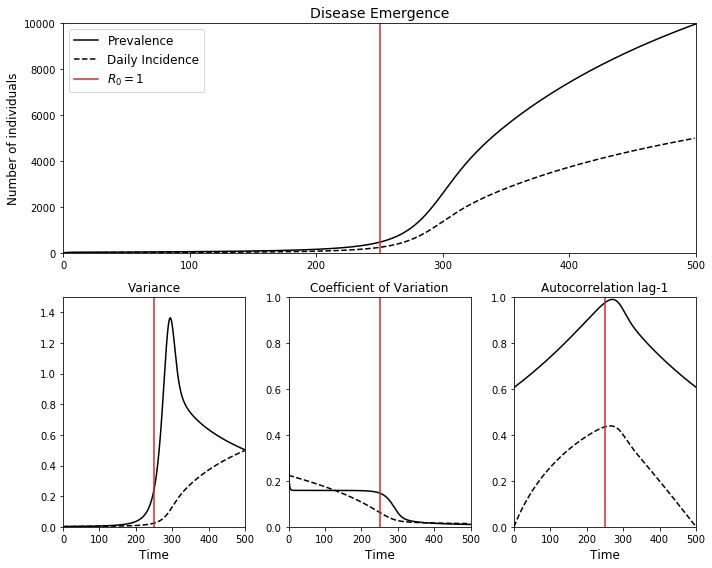

In [22]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(gs[0, :]) # row 0, col 0

plt.plot(ts,infection_em, c='k', label ='Prevalence')
plt.plot(range(500),[β_0*(p*ts[t])*infection_em[t]*(N-infection_em[t])/N + ν*(N-infection_em[t]) for t in np.arange(0,5000,10)], 
         '--',c='k',label ='Daily Incidence')
plt.plot([tstar, tstar], [0, 0.5*N], '-', c='tab:red', label = r'$R_0=1$')
plt.ylim([-1, 0.5*N])
plt.xlim([0, 500])
plt.legend(loc='upper left', fontsize = 12)
# plt.xlabel('Time', fontsize = 12)
plt.ylabel('Number of individuals', fontsize =12)
plt.title('Disease Emergence', fontsize = 14)
ax = plt.subplot(gs[1, 0]) # row 0, col 1

plt.plot(ts,P_em[:,1], c='k', label ='Prevalence')
plt.plot(range(500),[P_em[t,0] for t in np.arange(0,5000,10)], 
         '--',c='k',label ='Incidence')
plt.plot([tstar, tstar], [0, 10], '-', c='tab:red', label = r'$R_0=1$')

plt.ylim([0, 1.5
         ])
plt.xlim([0, 500])
# plt.legend(loc='upper left', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Variance', fontsize =12)


ax = plt.subplot(gs[1, 1]) # row 1, span all columns
plt.plot(ts,np.sqrt(P_em[:,1]/N)/P_em[:,0], c='k', label ='Prevalence')
plt.plot(range(500),np.sqrt(np.array(new_cases_em)/N)/np.array(new_cases_em), 
         '--',c='k',label ='Daily Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')

plt.ylim([0, 1])
plt.xlim([0, 500])
# plt.legend(loc='upper right', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Coefficient of Variation', fontsize =12)

ax = plt.subplot(gs[1, 2]) # row 1, span all columns
plt.plot(ts,[np.exp(-abs(ts[t]*p*(1-2*np.array(infection_em[t])/N)-γ-ν)) for t in range(len(ts))], 
         c='k', label ='Prevalence')
plt.plot(range(500),corrmu, 
         '--',c='k',label ='Daily Incidence')
plt.plot([tstar, tstar], [0, 0.7*N], '-', c='tab:red', label = r'$R_0=1$')
plt.ylim([0, 1])
plt.xlim([0, 500])
# plt.legend(loc='upper right', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Autocorrelation lag-1', fontsize =12)
fig.tight_layout()
fig.savefig('theory_emergence.pdf')

/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


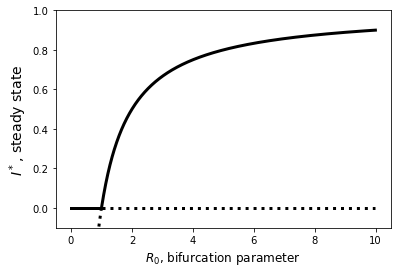

In [24]:
r_0 = np.arange(0, 10, 0.01)
plt.plot(r_0[r_0>1], [1-1/r for r in r_0 if r>1], c='k', lw =3)
plt.plot(r_0[r_0<1], [1-1/r for r in r_0 if r<1], ':', c='k', lw=3)
plt.plot(r_0[r_0<1], [0 for r in r_0 if r<1], c='k', lw=3)
plt.plot(r_0[r_0>1], [0 for r in r_0 if r>1], ':', c='k',lw=3)
plt.ylim([-0.1,1])
plt.xlabel(r'$R_0$, bifurcation parameter', fontsize =12)
plt.ylabel(r'$I^*$, steady state', fontsize =14)
plt.savefig('bifurcation_diagram.pdf')